## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

## Load data

In [4]:
df=pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#deleting unncessary column
df=df.drop(columns=['Id'])
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Prepocessing the dataset

In [7]:
#check for null values
df.isnull().sum()
#no null value is found so we move on

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploring the dataset

<AxesSubplot:>

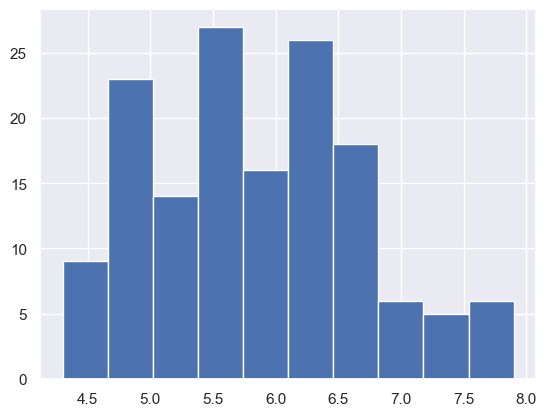

In [8]:
#histogram
df['SepalLengthCm'].hist()

<AxesSubplot:>

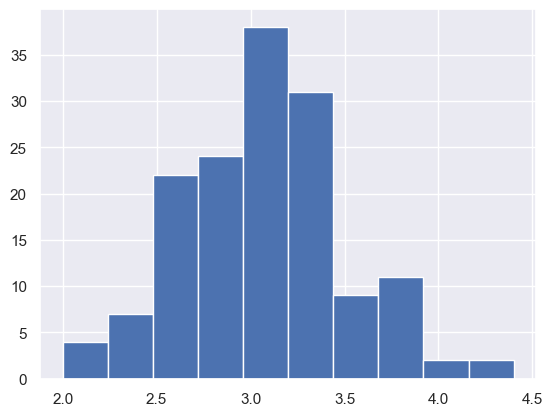

In [9]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

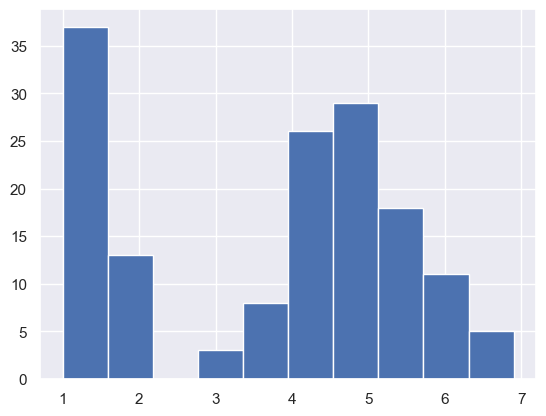

In [10]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

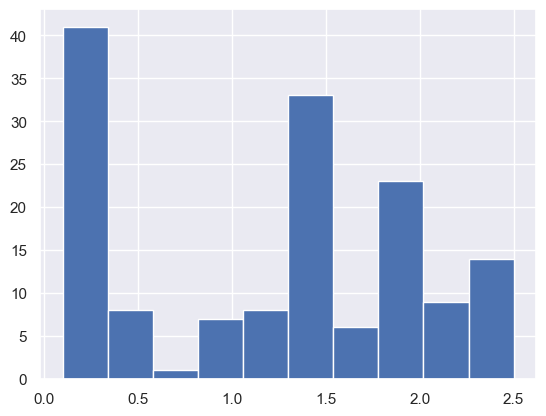

In [11]:
df['PetalWidthCm'].hist()

## Encoding the data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['Species']=le.fit_transform(df['Species'])

## Separating the data from the target

In [18]:
y=df['Species']
x=df.drop(columns=['Species'])

In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int32

## Scaling the data by Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scale=MinMaxScaler()

In [28]:
scaled_x=pd.DataFrame(scale.fit_transform(x))
print(scaled_x.head())

          0         1         2         3
0  0.222222  0.625000  0.067797  0.041667
1  0.166667  0.416667  0.067797  0.041667
2  0.111111  0.500000  0.050847  0.041667
3  0.083333  0.458333  0.084746  0.041667
4  0.194444  0.666667  0.067797  0.041667


## Splitting the data into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=0)

## Using Logicstic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
pred=lr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
acc=accuracy_score(y_test,pred)*100
acc

90.0

## After executing the following, it turns out our model has an accuracy of 90%